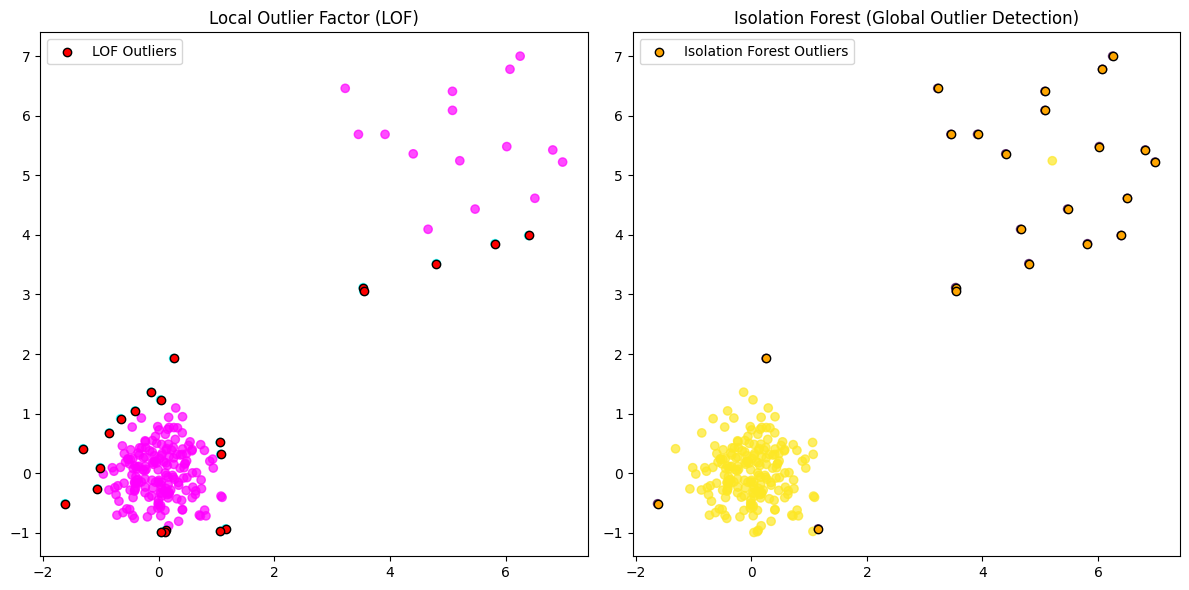

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# Step 1: Generate random 2D dataset
np.random.seed(42)
X_inliers = np.random.normal(0, 0.5, size=(200, 2))  # Normal data points
X_outliers = np.random.uniform(low=3, high=7, size=(20, 2))  # Outlier points
X = np.vstack([X_inliers, X_outliers])  # Combine inliers and outliers

# Step 2: Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X)  # LOF labels (-1 for outliers, 1 for inliers)

# Step 3: Apply Isolation Forest (Global Outlier Detection)
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_if = iso_forest.fit_predict(X)  # Isolation Forest labels (-1 for outliers, 1 for inliers)

# Step 4: Extract detected outliers for visualization
lof_outliers = X[y_pred_lof == -1]
if_outliers = X[y_pred_if == -1]

# Step 5: Plot results
plt.figure(figsize=(12, 6))

# Plot LOF results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_lof, cmap='cool', alpha=0.7)
plt.scatter(lof_outliers[:, 0], lof_outliers[:, 1], color='red', edgecolor='k', label='LOF Outliers')
plt.title('Local Outlier Factor (LOF)')
plt.legend()

# Plot Isolation Forest results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_if, cmap='viridis', alpha=0.7)
plt.scatter(if_outliers[:, 0], if_outliers[:, 1], color='orange', edgecolor='k', label='Isolation Forest Outliers')
plt.title('Isolation Forest (Global Outlier Detection)')
plt.legend()

plt.tight_layout()
plt.show()
